In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [4]:
print(type(model))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


<class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [5]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 15s 318us/step - loss: 0.2254 - acc: 0.9335 - val_loss: 0.1249 - val_acc: 0.9619
Epoch 2/5
48000/48000 [==============================] - 16s 336us/step - loss: 0.0881 - acc: 0.9742 - val_loss: 0.1168 - val_acc: 0.9647
Epoch 3/5
48000/48000 [==============================] - 17s 358us/step - loss: 0.0576 - acc: 0.9823 - val_loss: 0.0816 - val_acc: 0.9748
Epoch 4/5
48000/48000 [==============================] - 16s 342us/step - loss: 0.0405 - acc: 0.9869 - val_loss: 0.0872 - val_acc: 0.9748
Epoch 5/5
48000/48000 [==============================] - 17s 344us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0829 - val_acc: 0.9776


In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 47us/step


[0.07208181304231985, 0.979]

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


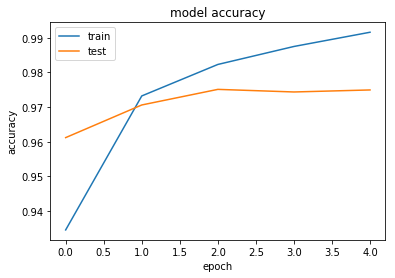

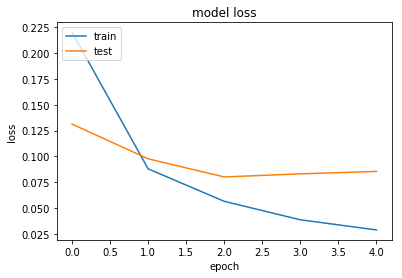

In [7]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()